# De Bruijn Sequences with NetworkX

De Bruijn sequences are an interesting concept to study, with many real life applications.

One interesting application is related to PIN code cracking. For a code to be cracked (in this example), only the last 4 digits must be correct, which means that all the digits typed before will be ignored. In other words: given a stream of digits, a code is cracked when the last 4 digits of the stream match the code.

If we want to crack such a 4-digit PIN code, one possible way would be to enumerate all the different combinations and try them one by one. In that case, there would be 10000 combinations to try (from 0000 to 9999), and for each combination, 4 digits must be typed. This results in a total of 40000 digits to type in order to bruteforce the code with this naive approach.

As we might guess, there must be a clever way to produce a list of digits, such that if entered sequentially, would cover all the possible codes in the minimal amount of digits.

And the answer is yes, there exists such a way, thanks to **De Bruijn sequences**. De Bruijn sequences are used in many different domains ranging from computer science to neuroscience. More in-depth information can be found on external websites:
1. De Bruijn Sequences on [Wikipedia](https://en.wikipedia.org/wiki/De_Bruijn_sequence)
2. De Bruijn Sequences on [Datagenetics](http://www.datagenetics.com/blog/october22013/index.html)

The article on Datagenetics provides a (the only?) 10003 digits long solution to the code cracking problem. It also explains the basic idea of these sequences and how to get to that solution.

Alright, let's get started and copy the solution below to use it as a reference. 

## Reference

In [1]:
REF = '0000100020003000400050006000700080009001100120013001400150016001700180019002100220023002400250026002700280029003100320033003400350036003700380039004100420043004400450046004700480049005100520053005400550056005700580059006100620063006400650066006700680069007100720073007400750076007700780079008100820083008400850086008700880089009100920093009400950096009700980099010102010301040105010601070108010901110112011301140115011601170118011901210122012301240125012601270128012901310132013301340135013601370138013901410142014301440145014601470148014901510152015301540155015601570158015901610162016301640165016601670168016901710172017301740175017601770178017901810182018301840185018601870188018901910192019301940195019601970198019902020302040205020602070208020902110212021302140215021602170218021902210222022302240225022602270228022902310232023302340235023602370238023902410242024302440245024602470248024902510252025302540255025602570258025902610262026302640265026602670268026902710272027302740275027602770278027902810282028302840285028602870288028902910292029302940295029602970298029903030403050306030703080309031103120313031403150316031703180319032103220323032403250326032703280329033103320333033403350336033703380339034103420343034403450346034703480349035103520353035403550356035703580359036103620363036403650366036703680369037103720373037403750376037703780379038103820383038403850386038703880389039103920393039403950396039703980399040405040604070408040904110412041304140415041604170418041904210422042304240425042604270428042904310432043304340435043604370438043904410442044304440445044604470448044904510452045304540455045604570458045904610462046304640465046604670468046904710472047304740475047604770478047904810482048304840485048604870488048904910492049304940495049604970498049905050605070508050905110512051305140515051605170518051905210522052305240525052605270528052905310532053305340535053605370538053905410542054305440545054605470548054905510552055305540555055605570558055905610562056305640565056605670568056905710572057305740575057605770578057905810582058305840585058605870588058905910592059305940595059605970598059906060706080609061106120613061406150616061706180619062106220623062406250626062706280629063106320633063406350636063706380639064106420643064406450646064706480649065106520653065406550656065706580659066106620663066406650666066706680669067106720673067406750676067706780679068106820683068406850686068706880689069106920693069406950696069706980699070708070907110712071307140715071607170718071907210722072307240725072607270728072907310732073307340735073607370738073907410742074307440745074607470748074907510752075307540755075607570758075907610762076307640765076607670768076907710772077307740775077607770778077907810782078307840785078607870788078907910792079307940795079607970798079908080908110812081308140815081608170818081908210822082308240825082608270828082908310832083308340835083608370838083908410842084308440845084608470848084908510852085308540855085608570858085908610862086308640865086608670868086908710872087308740875087608770878087908810882088308840885088608870888088908910892089308940895089608970898089909091109120913091409150916091709180919092109220923092409250926092709280929093109320933093409350936093709380939094109420943094409450946094709480949095109520953095409550956095709580959096109620963096409650966096709680969097109720973097409750976097709780979098109820983098409850986098709880989099109920993099409950996099709980999111121113111411151116111711181119112211231124112511261127112811291132113311341135113611371138113911421143114411451146114711481149115211531154115511561157115811591162116311641165116611671168116911721173117411751176117711781179118211831184118511861187118811891192119311941195119611971198119912121312141215121612171218121912221223122412251226122712281229123212331234123512361237123812391242124312441245124612471248124912521253125412551256125712581259126212631264126512661267126812691272127312741275127612771278127912821283128412851286128712881289129212931294129512961297129812991313141315131613171318131913221323132413251326132713281329133213331334133513361337133813391342134313441345134613471348134913521353135413551356135713581359136213631364136513661367136813691372137313741375137613771378137913821383138413851386138713881389139213931394139513961397139813991414151416141714181419142214231424142514261427142814291432143314341435143614371438143914421443144414451446144714481449145214531454145514561457145814591462146314641465146614671468146914721473147414751476147714781479148214831484148514861487148814891492149314941495149614971498149915151615171518151915221523152415251526152715281529153215331534153515361537153815391542154315441545154615471548154915521553155415551556155715581559156215631564156515661567156815691572157315741575157615771578157915821583158415851586158715881589159215931594159515961597159815991616171618161916221623162416251626162716281629163216331634163516361637163816391642164316441645164616471648164916521653165416551656165716581659166216631664166516661667166816691672167316741675167616771678167916821683168416851686168716881689169216931694169516961697169816991717181719172217231724172517261727172817291732173317341735173617371738173917421743174417451746174717481749175217531754175517561757175817591762176317641765176617671768176917721773177417751776177717781779178217831784178517861787178817891792179317941795179617971798179918181918221823182418251826182718281829183218331834183518361837183818391842184318441845184618471848184918521853185418551856185718581859186218631864186518661867186818691872187318741875187618771878187918821883188418851886188718881889189218931894189518961897189818991919221923192419251926192719281929193219331934193519361937193819391942194319441945194619471948194919521953195419551956195719581959196219631964196519661967196819691972197319741975197619771978197919821983198419851986198719881989199219931994199519961997199819992222322242225222622272228222922332234223522362237223822392243224422452246224722482249225322542255225622572258225922632264226522662267226822692273227422752276227722782279228322842285228622872288228922932294229522962297229822992323242325232623272328232923332334233523362337233823392343234423452346234723482349235323542355235623572358235923632364236523662367236823692373237423752376237723782379238323842385238623872388238923932394239523962397239823992424252426242724282429243324342435243624372438243924432444244524462447244824492453245424552456245724582459246324642465246624672468246924732474247524762477247824792483248424852486248724882489249324942495249624972498249925252625272528252925332534253525362537253825392543254425452546254725482549255325542555255625572558255925632564256525662567256825692573257425752576257725782579258325842585258625872588258925932594259525962597259825992626272628262926332634263526362637263826392643264426452646264726482649265326542655265626572658265926632664266526662667266826692673267426752676267726782679268326842685268626872688268926932694269526962697269826992727282729273327342735273627372738273927432744274527462747274827492753275427552756275727582759276327642765276627672768276927732774277527762777277827792783278427852786278727882789279327942795279627972798279928282928332834283528362837283828392843284428452846284728482849285328542855285628572858285928632864286528662867286828692873287428752876287728782879288328842885288628872888288928932894289528962897289828992929332934293529362937293829392943294429452946294729482949295329542955295629572958295929632964296529662967296829692973297429752976297729782979298329842985298629872988298929932994299529962997299829993333433353336333733383339334433453346334733483349335433553356335733583359336433653366336733683369337433753376337733783379338433853386338733883389339433953396339733983399343435343634373438343934443445344634473448344934543455345634573458345934643465346634673468346934743475347634773478347934843485348634873488348934943495349634973498349935353635373538353935443545354635473548354935543555355635573558355935643565356635673568356935743575357635773578357935843585358635873588358935943595359635973598359936363736383639364436453646364736483649365436553656365736583659366436653666366736683669367436753676367736783679368436853686368736883689369436953696369736983699373738373937443745374637473748374937543755375637573758375937643765376637673768376937743775377637773778377937843785378637873788378937943795379637973798379938383938443845384638473848384938543855385638573858385938643865386638673868386938743875387638773878387938843885388638873888388938943895389638973898389939394439453946394739483949395439553956395739583959396439653966396739683969397439753976397739783979398439853986398739883989399439953996399739983999444454446444744484449445544564457445844594465446644674468446944754476447744784479448544864487448844894495449644974498449945454645474548454945554556455745584559456545664567456845694575457645774578457945854586458745884589459545964597459845994646474648464946554656465746584659466546664667466846694675467646774678467946854686468746884689469546964697469846994747484749475547564757475847594765476647674768476947754776477747784779478547864787478847894795479647974798479948484948554856485748584859486548664867486848694875487648774878487948854886488748884889489548964897489848994949554956495749584959496549664967496849694975497649774978497949854986498749884989499549964997499849995555655575558555955665567556855695576557755785579558655875588558955965597559855995656575658565956665667566856695676567756785679568656875688568956965697569856995757585759576657675768576957765777577857795786578757885789579657975798579958585958665867586858695876587758785879588658875888588958965897589858995959665967596859695976597759785979598659875988598959965997599859996666766686669667766786679668766886689669766986699676768676967776778677967876788678967976798679968686968776878687968876888688968976898689969697769786979698769886989699769986999777787779778877897798779978787978887889789878997979887989799879998888988998989999000'

One might wonder why look at that problem if it is already largely covered online by many great resources?

Well, I thought it would be interesting to try to find a solution, but with a different approach.

First, let's look at the (trimmed) code provided on the Wikipedia page generating a De Bruijn sequence for the given parameters `k` and `n`.

In [2]:
def de_bruijn(k, n):
    alphabet = list(map(str, range(k)))
    
    a = [0] * k * n
    sequence = []
    
    def db(t, p):
        if t > n:
            if n % p == 0:
                sequence.extend(a[1:p + 1])
        else:
            a[t] = a[t - p]
            db(t + 1, p)
            for j in range(a[t - p] + 1, k):
                a[t] = j
                db(t + 1, t)
    
    db(1, 1)
    return ''.join(alphabet[i] for i in sequence)

Now let's verify this code produces an optimal solution. A solution is valid if it contains all the different codes from 0000 to 9999. And it's optimal if its length is not greater than the reference solution (considered as the best solution).

In [3]:
from itertools import product

In [4]:
def check_solution(k, n, sol):
    '''Check against the solution sol'''
    for p in product(''.join(map(str, range(k))), repeat=n):
        code = ''.join(p)
        if code not in sol:
            return False
    return True

In [5]:
ls = de_bruijn(10, 4)
ls += ls[:3]  # wrap around
print('Good solution?', check_solution(10, 4, ls))

Good solution? True


At least we find the same result, which is comforting.

But let's be honest. This code snippet from Wikipedia is quite opaque. It would be nice to develop a more intuitive feeling of the problem.

## With NetworkX

Representing this problem as a graph problems makes it more intuitive to understand. It is possible to represent the codes as the nodes and the digits (typed one by one) as the edges of a graph:

<img class="center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/De_bruijn_graph-for_binary_sequence_of_order_4.svg/548px-De_bruijn_graph-for_binary_sequence_of_order_4.svg.png" alt="De Bruijn Graph example" style="background-color: white;" />

De Bruijn sequences have this great property of being generated by finding an **Eulerian cycle** from a De Bruijn graph.

The De Bruijn sequence corresponding to the De Bruijn graph above is: `0000111101100101`.

Why does the Eulerian cycle give a valid sequence? A few observations can be made without entering into too much details and proofs:

- Each node represents a distinct code.
- All the codes must be tried at least once, so each node has to be visited at least once.
- One code can be created from another by entering a new digit (edge between two nodes).

With these points in mind, the problem is reduced to the implementation of the Eulerian cycle algorithm on the De Bruijn graph. This can be done from scratch, but we can also speed-up the process and use the existing `NetworkX` graph library.

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def create_de_bruijn_graph(k, n):
    g = nx.DiGraph()
    for p in product(tuple(map(str, range(k))), repeat=n):
        code = ''.join(p)
        u = str(code).zfill(n)
        tmp = u[1:]
        for i in range(k):
            v = tmp + str(i)
            g.add_edge(u, v, weight=i)
    return g
    
def de_bruijn_nx(k, n):
    g = create_de_bruijn_graph(k, n)
    ls = nx.eulerian_circuit(g)
    res = ''.join(map(str, (g.get_edge_data(*e)['weight'] for e in ls)))
    return res

We can plot the De Bruijn graph corresponding to the image above to visually verify its correctness.

In [8]:
def draw_de_bruijn_graph(g):
    plt.figure(figsize=(20,20), dpi=80)
    nx.draw_networkx(
        g, pos=nx.circular_layout(g),
        node_shape='o', node_size=4000, font_size=20,
        edge_color='#555555', width=3.0
    )
    nx.draw_networkx_edge_labels(
        g, pos=nx.circular_layout(g), 
        edge_labels=nx.get_edge_attributes(g, 'weight'),
        font_size=24, label_pos=0.25, rotate=False
    )
    plt.axis('off')
    plt.show() 

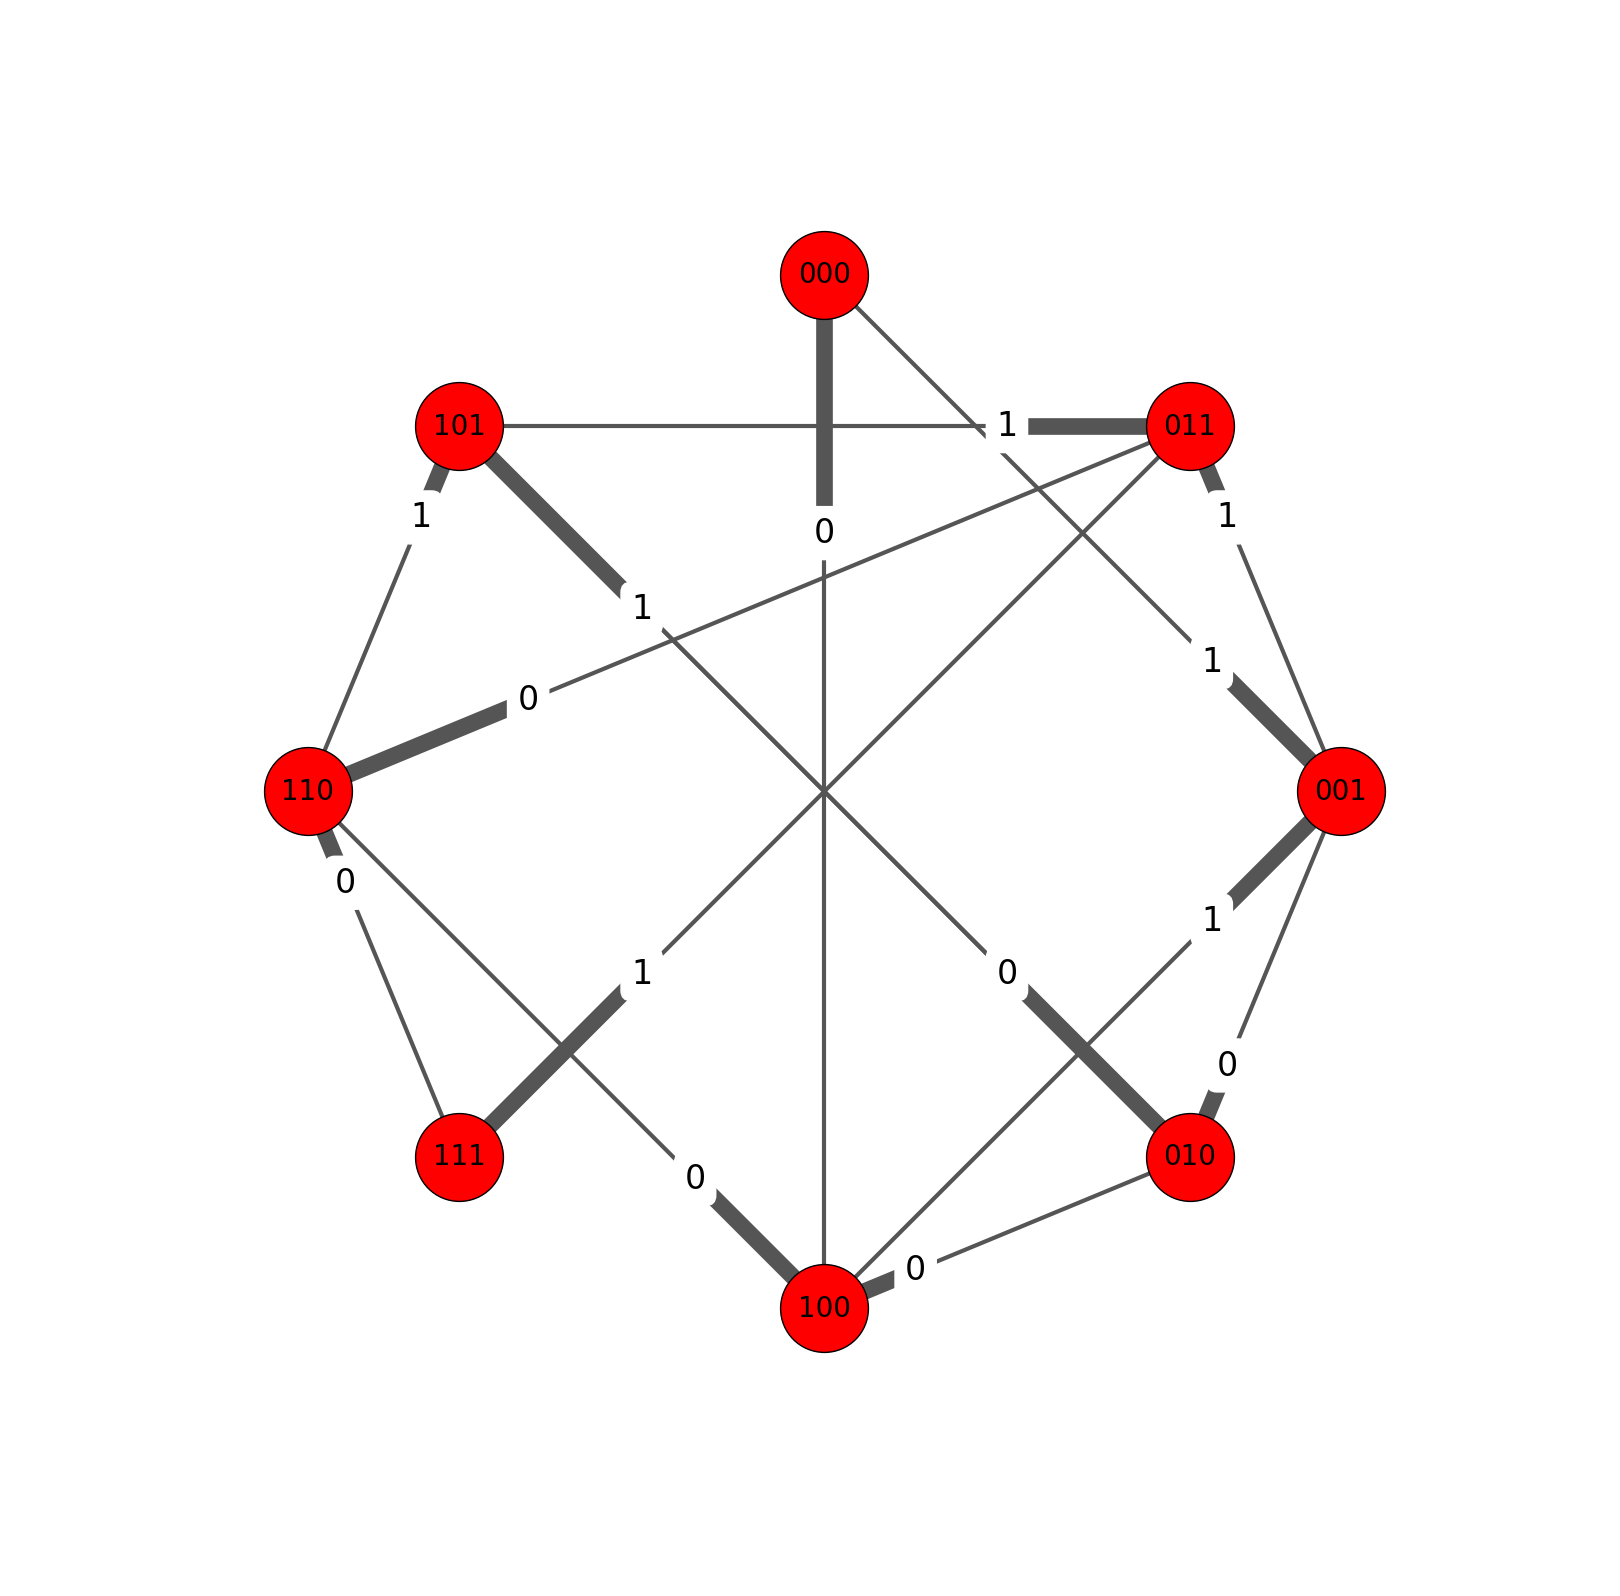

In [9]:
draw_de_bruijn_graph(create_de_bruijn_graph(2, 3))

The `circular_layout` is in that case more suited than the default spring layout. And even though this plot is quite simple (and doesn't show the loop for node `000`), we can still visually verify the graph against the one above.

Now with the real values `k = 10` and `n = 4`:

In [10]:
res = de_bruijn_nx(10, 4)
res += res[:3]  # wrap around
print('Solution (overview): %s...%s' % (res[:50], res[-50:]))
print('Good solution?', check_solution(10, 4, res))

Solution (overview): 16255004019983523821923269393645738058512587270874...21029426911638198665010844534159683130383134958162
Good solution? True


The solution contains all the codes. However it looks different than the reference.

In [11]:
is_circular_permutation = res in (REF + REF)
print('Is circular permutation?', is_circular_permutation)

Is circular permutation? False


That's a practical way to notice that given a De Bruijn graph, the corresponding De Bruijn sequences are not unique.

## Wrap up

There are many more things to learn from De Bruijn sequences. At least now we know that NetworkX is handy for some of the applications!